In [100]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

#col_names = ['chrom','start','end','svtype','cn','nsnp','startsnp', 'endsnp', 'conf', 'iid','common_sv','mask_pass','pli_gene', 'max_pli', 'REC_gene', 'max_REC','n_genes', 'genes','n_pli' , 'pli','n_rec','rec','nsnp_less_than_7']

# is there a reason why you re-defined the header?
df = pd.read_csv(r'C:\Users\aqngu\Desktop\Gleeson_Lab\Exome_Negative_CIDR\Results\cidr_2017_2018_stitched_nsnpfil_cnpflagged_maskpass_burden.tsv' , sep='\t')# header=None, skiprows=1, names=col_names)
df.head()

,chrom,start,end,svtype,cn,nsnp,startsnp,endsnp,conf,iid,...,max_pli,REC_gene,max_REC,n_genes,genes,n_pli,pli,n_rec,rec,nsnp_less_than_7
0,1,752721,1179816,DUP,3,248,rs3131972,exm2001,41.800375,WG3002051-DNAF06-P2097-S649_4340_6_1-1-0224061976,...,5.4727e-07,AGRN,1.0,14,"AGRN,B3GALT6,C1orf159,HES4,ISG15,KLHL17,NOC2L,...",0,.,0,.,False
1,1,752721,5722405,DEL,1,1392,rs3131972,rs770721,555.092813,WG3002809-DNAC01-P2211-S649_5738_5_4-1-1163278483,...,0.99999,ACAP3,0.99998,67,"ACAP3,ACTRT2,AGRN,AJAP1,ANKRD65,ARHGEF16,ATAD3...",8,"AJAP1,GABRD,GNB1,PANK4,PRDM16,SKI,TP73,UBE2J2",0,.,False
2,1,752721,5722405,DEL,1,1485,rs3131972,rs770721,462.402625,WG3002809-DNAC02-P2211-S649_5738_5_5-1-1163278491,...,0.99999,ACAP3,0.99998,67,"ACAP3,ACTRT2,AGRN,AJAP1,ANKRD65,ARHGEF16,ATAD3...",8,"AJAP1,GABRD,GNB1,PANK4,PRDM16,SKI,TP73,UBE2J2",0,.,False
3,1,752721,846808,DEL,1,5,rs3131972,rs4475691,15.323000,WG3002055-DNAD03-P2097-S649_5035_5_2-1-0224134284,...,.,.,.,.,.,.,.,.,.,True
4,1,752721,846808,DUP,3,5,rs3131972,rs4475691,10.946000,WG3002054-DNAD02-P2097-S649_2757_4_1-1-0224134475,...,.,.,.,.,.,.,.,.,.,True


In [84]:
qc = pd.read_csv(r'C:\Users\aqngu\Desktop\Gleeson_Lab\Exome_Negative_CIDR\Results\QC_table_stats_full_exomeneg_2017_2018.tsv',sep="\t")
# get a unique list of samples that failed QC
fail = set(qc.loc[qc['Qc_pass']==False]['iid'])
print('failed samples: ',len(fail))

failed samples:  68


In [101]:
'''
True and False are of type Boolean 
https://problemsolvingwithpython.com/04-Data-Types-and-Variables/04.02-Boolean-Data-Type/
'''

#df5["mask_pass"] = df5["mask_pass"].astype(str)
#df5["nsnp_less_than_7"] = df5["nsnp_less_than_7"].astype(str)
#df6 = df5[(df5.nsnp_less_than_7 == 'False') & (df5.mask_pass == 'True')]

# filter out noisy CNVs

print('before filtering: ',len(df))
df2 = df.loc[(
    df['nsnp_less_than_7']==False) & 
    (df['mask_pass']==True) & 
    (df['common_sv']==False) &
    (df['conf'] > 10) &
    (df['n_genes']!='.') &
    (df['svtype']=='DEL') &
    (~df['iid'].isin(fail)) # ~ is a NOT 
]
print('after filtering:',len(df2))
"""
cast the type back to int
"""

df2['n_genes']=df2['n_genes'].astype(int)
df2['n_pli']=df2['n_pli'].astype(int)
df2['n_rec']=df2['n_rec'].astype(int)
df2['max_pli']=df2['max_pli'].astype(float)
df2['max_REC']=df2['max_REC'].astype(float)
print(df2.dtypes)


before filtering:  192309
after filtering: 63232
chrom                 int64
start                 int64
end                   int64
svtype               object
cn                    int64
nsnp                  int64
startsnp             object
endsnp               object
conf                float64
iid                  object
common_sv              bool
mask_pass              bool
pli_gene             object
max_pli             float64
REC_gene             object
max_REC             float64
n_genes               int32
genes                object
n_pli                 int32
pli                  object
n_rec                 int32
rec                  object
nsnp_less_than_7       bool
dtype: object


C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

deletion gene burden
MIN:1    MAX:2393
MEAN:94.77    MEDIAN:5.0
IQR:2.0-43.25    SD:252.11

deletion lengths
MIN:6    MAX:16836504
MEAN:34300.94    MEDIAN:5604.0
IQR:1499.0-17431.0    SD:256725.75

n del >10Mb: 4


C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


"\nok there are a ton of samples with a lot of gene burden, could be real or not. IDK i'm skeptical to be honest.\nSo please continue and redo the plots using this an example. \n"

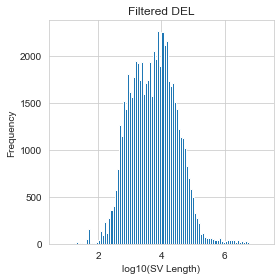

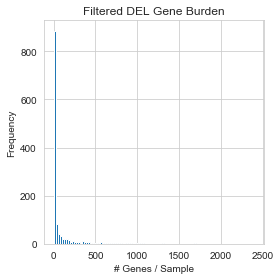

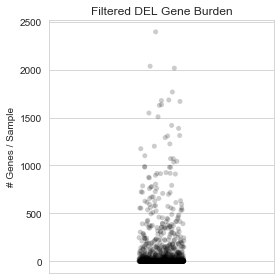

In [86]:
"""
You need to calculate the mean n_genes PER SAMPLE

this is what I searched "pandas sum column by value in another column"
first result: 
https://stackoverflow.com/questions/56360610/sum-column-based-on-another-column-in-pandas-dataframe
"""

def sumstats(x):
    """x is a list of values"""
    mi = min(x)
    ma = max(x)
    mean = np.mean(x)
    med = np.median(x)
    q75, q25 = np.percentile(x, [75 ,25])
    sd = np.std(x)
    o = 'MIN:{mi}    MAX:{ma}\nMEAN:{mean}    MEDIAN:{med}\nIQR:{q25}-{q75}    SD:{sd}'.format(
        mi=mi,ma=ma,
        mean=np.round(mean,2),med=np.round(med,2),
        q25=np.round(q25,2),q75=np.round(q75,2), sd=np.round(sd,2)
    )
    print(o)

gene_burden = df2.groupby(by=["iid"])["n_genes"].sum()
print('deletion gene burden')
sumstats(gene_burden)
"""
there is something odd with 2k+ gene burden
let's look at the lengths of the SVs to see if there are 
any super large (>10Mb) events
"""
print('\ndeletion lengths')
svlen = df2['end']-df2['start']
sumstats(svlen)
"""
use list comprehension to print the number of dels
>10Mb
"""

print('\nn del >10Mb:', len([x for x in svlen if x > 1e7]))
"""
ok that's interesting, now lets look at a histogram of the del lengths 
before we look at the gene burden
"""

sns.set_style('whitegrid') # I like this for most plots because it aids with observation
f, ax = plt.subplots(1,1,figsize=(4,4))

# make the bins = 100 because it will show you percentile distribution (1-100)
# for example bins=5 is a quintile distribution

ax.hist(np.log10(svlen),bins=100)
ax.set_title('Filtered DEL')
ax.set_xlabel('log10(SV Length)') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()

"""ok now for the gene burden"""
f, ax = plt.subplots(1,1,figsize=(4,4))
ax.hist(gene_burden,bins=100)
ax.set_title('Filtered DEL Gene Burden')
ax.set_xlabel('# Genes / Sample') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()

"""ok that's interesting you have a long right tail which means you have many samples with a lot of burden
this is expected if you look at the summary stats, The Mean and Median values are very different. When you 
have a mean that is much greater or lesser than your median, it means your data are likely skewed to the right/left

so now let's look at the individual points like I mentioned in slack
"""

f, ax = plt.subplots(1,1,figsize=(4,4))
#sns.boxplot(y=gene_burden,ax=ax)
# box plot didn't look so good because the data are so skewed. 
sns.stripplot(
    y=gene_burden,
    ax=ax,
    color='k', # black 
    alpha=0.2, #transparency 
)
ax.set_title('Filtered DEL Gene Burden')
ax.set_ylabel('# Genes / Sample') # always label your plots
ax.set_xlabel('')
f.tight_layout()
f.show()

"""
ok there are a ton of samples with a lot of gene burden, could be real or not. IDK i'm skeptical to be honest.
So please continue and redo the plots using this an example. 
"""

#df7["n_genes"] = df7["n_genes"].astype(float)
#df7['n_genes'].sum()
#df7['n_genes'].mean()
#df7['n_genes'].median()
#df7['n_genes'].quantile(.25)
#df7['n_genes'].min()
#df7['n_genes'].max()

In [87]:
print('before filtering: ',len(df))


df3 = df.loc[(
    df['nsnp_less_than_7']==False) & 
    (df['mask_pass']==True) & 
    (df['common_sv']==False) &
    (df['conf'] > 10) &
    (df['n_genes']!='.') &
    (df['svtype']=='DEL') &
    (~df['iid'].isin(fail) & # ~ is a NOT 
     (df['cn'] == 0)) 
]
print('after filtering:',len(df3))
"""
cast the type back to int
"""

df3['n_genes']=df3['n_genes'].astype(int)
df3['n_pli']=df3['n_pli'].astype(int)
df3['n_rec']=df3['n_rec'].astype(int)
df3['max_pli']=df3['max_pli'].astype(float)
df3['max_REC']=df3['max_REC'].astype(float)
print(df3.dtypes)

before filtering:  192309
after filtering: 103
chrom                 int64
start                 int64
end                   int64
svtype               object
cn                    int64
nsnp                  int64
startsnp             object
endsnp               object
conf                float64
iid                  object
common_sv              bool
mask_pass              bool
pli_gene             object
max_pli             float64
REC_gene             object
max_REC             float64
n_genes               int32
genes                object
n_pli                 int32
pli                  object
n_rec                 int32
rec                  object
nsnp_less_than_7       bool
dtype: object


C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

deletion gene burden
MIN:1    MAX:13
MEAN:1.55    MEDIAN:1.0
IQR:1.0-2.0    SD:1.51

deletion lengths
MIN:309    MAX:264378
MEAN:15411.86    MEDIAN:2511.0
IQR:495.0-8348.0    SD:34380.37

n del >10Mb: 0


C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


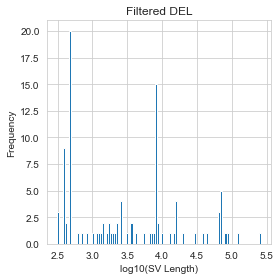

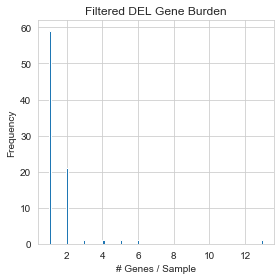

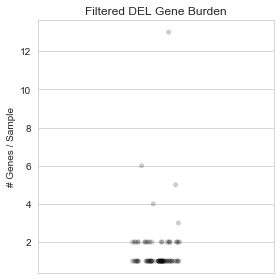

In [88]:
gene_burden2 = df3.groupby(by=["iid"])["n_genes"].sum()
print('deletion gene burden')
sumstats(gene_burden2)
"""
there is something odd with 2k+ gene burden
let's look at the lengths of the SVs to see if there are 
any super large (>10Mb) events
"""
print('\ndeletion lengths')
svlen2 = df3['end']-df3['start']
sumstats(svlen2)
"""
use list comprehension to print the number of dels
>10Mb
"""

print('\nn del >10Mb:', len([x for x in svlen2 if x > 1e7]))
"""
ok that's interesting, now lets look at a histogram of the del lengths 
before we look at the gene burden
"""

sns.set_style('whitegrid') # I like this for most plots because it aids with observation
f, ax = plt.subplots(1,1,figsize=(4,4))

# make the bins = 100 because it will show you percentile distribution (1-100)
# for example bins=5 is a quintile distribution

ax.hist(np.log10(svlen2),bins=100)
ax.set_title('Filtered DEL')
ax.set_xlabel('log10(SV Length)') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()

"""ok now for the gene burden"""
f, ax = plt.subplots(1,1,figsize=(4,4))
ax.hist(gene_burden2,bins=100)
ax.set_title('Filtered DEL Gene Burden')
ax.set_xlabel('# Genes / Sample') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()

"""ok that's interesting you have a long right tail which means you have many samples with a lot of burden
this is expected if you look at the summary stats, The Mean and Median values are very different. When you 
have a mean that is much greater or lesser than your median, it means your data are likely skewed to the right/left

so now let's look at the individual points like I mentioned in slack
"""

f, ax = plt.subplots(1,1,figsize=(4,4))
#sns.boxplot(y=gene_burden,ax=ax)
# box plot didn't look so good because the data are so skewed. 
sns.stripplot(
    y=gene_burden2,
    ax=ax,
    color='k', # black 
    alpha=0.2, #transparency 
)
ax.set_title('Filtered DEL Gene Burden')
ax.set_ylabel('# Genes / Sample') # always label your plots
ax.set_xlabel('')
f.tight_layout()
f.show()


MIN:7.8985e-63    MAX:1.0
MEAN:0.14    MEDIAN:0.11
IQR:0.0-0.22    SD:0.17


C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


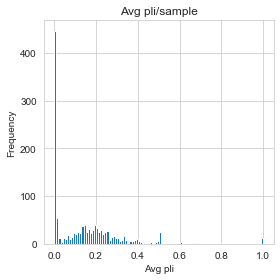

In [89]:
max_pli = df2.groupby(by=["iid"])["max_pli"].mean()
#print('deletion gene burden')
sumstats(max_pli)
sns.set_style('whitegrid') # I like this for most plots because it aids with observation
f, ax = plt.subplots(1,1,figsize=(4,4))

# make the bins = 100 because it will show you percentile distribution (1-100)
# for example bins=5 is a quintile distribution

ax.hist(max_pli,bins=100)
ax.set_title('Avg pli/sample')
ax.set_xlabel('Avg pli') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()


MIN:7.9928e-13    MAX:1.0
MEAN:0.49    MEDIAN:0.51
IQR:0.4-0.59    SD:0.22


C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


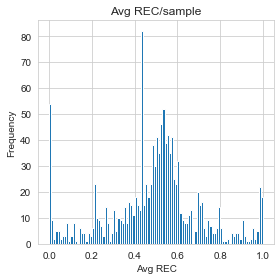

In [90]:
max_REC = df2.groupby(by=["iid"])["max_REC"].mean()
#print('deletion gene burden')
sumstats(max_REC)
sns.set_style('whitegrid') # I like this for most plots because it aids with observation
f, ax = plt.subplots(1,1,figsize=(4,4))

# make the bins = 100 because it will show you percentile distribution (1-100)
# for example bins=5 is a quintile distribution

ax.hist(max_REC,bins=100)
ax.set_title('Avg REC/sample')
ax.set_xlabel('Avg REC') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()

In [113]:
print('before filtering: ',len(df))
df4 = df.loc[
    (df['nsnp_less_than_7']==False) &
    (df['mask_pass']==True) & 
    (df['common_sv']==False) &
    (df['conf'] > 10) &
    (df['n_genes']!='.') &
    (df['svtype']=='DEL') &
    (~df['iid'].isin(fail)) & # ~ is a NOT 
     (df['cn'] == 0) &
     (df['max_REC']!='.')
]
print('after filtering:',len(df4))
"""
cast the type back to int
"""

df4['n_genes']=df4['n_genes'].astype(int)
df4['n_pli']=df4['n_pli'].astype(int)
df4['n_rec']=df4['n_rec'].astype(int)
df4['max_pli']=df4['max_pli'].astype(float)
df4['max_REC']=df4['max_REC'].astype(float)
print(df4.dtypes)

before filtering:  192309
after filtering: 103
chrom                 int64
start                 int64
end                   int64
svtype               object
cn                    int64
nsnp                  int64
startsnp             object
endsnp               object
conf                float64
iid                  object
common_sv              bool
mask_pass              bool
pli_gene             object
max_pli             float64
REC_gene             object
max_REC             float64
n_genes               int32
genes                object
n_pli                 int32
pli                  object
n_rec                 int32
rec                  object
nsnp_less_than_7       bool
dtype: object


C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [105]:
print('before filtering: ',len(df4))
df4 = df4.loc[(
    df4['max_REC'] > .9)
]
print('after filtering:',len(df4))  

before filtering:  103
after filtering: 38


In [114]:
df4.head()

,chrom,start,end,svtype,cn,nsnp,startsnp,endsnp,conf,iid,...,max_pli,REC_gene,max_REC,n_genes,genes,n_pli,pli,n_rec,rec,nsnp_less_than_7
28467,11,5876325,5878836,DEL,0,8,rs10838734,exm884114,22.574,WG3002812-DNAE09-P2211-S649_7181_3_2-1-1163278026,...,0.380770,TRIM5,0.90188,2,"OR52E8,TRIM5",0,.,0,.,False
28468,11,5876325,5878836,DEL,0,8,rs10838734,exm884114,31.085,WG3002807-DNAC10-P2211-S649_4311_6_2-1-1163278363,...,0.380770,TRIM5,0.90188,2,"OR52E8,TRIM5",0,.,0,.,False
28469,11,5876325,5878836,DEL,0,8,rs10838734,exm884114,31.393,WG3002807-DNAC12-P2211-S649_4311_6_4-1-1163278379,...,0.380770,TRIM5,0.90188,2,"OR52E8,TRIM5",0,.,0,.,False
28778,11,6879173,6895415,DEL,0,12,rs2595471,rs1449138,41.255,WG3002054-DNAG08-P2097-S649_3953_4_2-1-0224134442,...,0.003121,OR10A2,0.61268,1,OR10A2,0,.,0,.,False
28779,11,6879173,6895415,DEL,0,12,rs2595471,rs1449138,43.504,WG3002054-DNAG09-P2097-S649_3953_5_1-1-0224134441,...,0.003121,OR10A2,0.61268,1,OR10A2,0,.,0,.,False


deletion gene burden
MIN:1    MAX:13
MEAN:1.55    MEDIAN:1.0
IQR:1.0-2.0    SD:1.51

deletion lengths
MIN:309    MAX:264378
MEAN:15411.86    MEDIAN:2511.0
IQR:495.0-8348.0    SD:34380.37

n del >10Mb: 0


C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


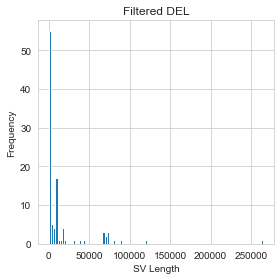

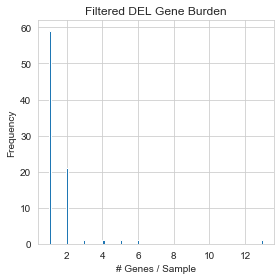

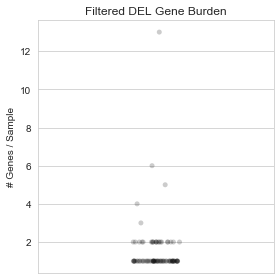

In [115]:
gene_burden3 = df4.groupby(by=["iid"])["n_genes"].sum()
print('deletion gene burden')
sumstats(gene_burden3)
"""
there is something odd with 2k+ gene burden
let's look at the lengths of the SVs to see if there are 
any super large (>10Mb) events
"""
print('\ndeletion lengths')
svlen3 = df4['end']-df4['start']
sumstats(svlen3)
"""
use list comprehension to print the number of dels
>10Mb
"""

print('\nn del >10Mb:', len([x for x in svlen3 if x > 1e7]))
"""
ok that's interesting, now lets look at a histogram of the del lengths 
before we look at the gene burden
"""

sns.set_style('whitegrid') # I like this for most plots because it aids with observation
f, ax = plt.subplots(1,1,figsize=(4,4))

# make the bins = 100 because it will show you percentile distribution (1-100)
# for example bins=5 is a quintile distribution

ax.hist(svlen3,bins=100)
ax.set_title('Filtered DEL')
ax.set_xlabel('SV Length') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()

"""ok now for the gene burden"""
f, ax = plt.subplots(1,1,figsize=(4,4))
ax.hist(gene_burden3,bins=100)
ax.set_title('Filtered DEL Gene Burden')
ax.set_xlabel('# Genes / Sample') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()

"""ok that's interesting you have a long right tail which means you have many samples with a lot of burden
this is expected if you look at the summary stats, The Mean and Median values are very different. When you 
have a mean that is much greater or lesser than your median, it means your data are likely skewed to the right/left

so now let's look at the individual points like I mentioned in slack
"""

f, ax = plt.subplots(1,1,figsize=(4,4))
#sns.boxplot(y=gene_burden,ax=ax)
# box plot didn't look so good because the data are so skewed. 
sns.stripplot(
    y=gene_burden3,
    ax=ax,
    color='k', # black 
    alpha=0.2, #transparency 
)
ax.set_title('Filtered DEL Gene Burden')
ax.set_ylabel('# Genes / Sample') # always label your plots
ax.set_xlabel('')
f.tight_layout()
f.show()

In [134]:
filtered = gene_burden3.reset_index().sort_values('n_genes', ascending=False)


In [136]:
filtered.head(20)

,iid,n_genes
81,WG3002813-DNAC10-P2211-S649_4554_5_5-1-1163277787,13
36,WG3002805-DNAB11-P2211-S649_2801_4_4-1-1163278178,6
14,WG3002051-DNAE09-P2097-S649_3860_4_2-1-0224061986,5
46,WG3002806-DNAF12-P2211-S649_3949_5_1-1-1163278094,4
34,WG3002805-DNAA12-P2211-S649_2100_4_2-1-1163278185,3
32,WG3002805-DNAA10-P2211-S649_2100_3_2-1-1163278169,2
33,WG3002805-DNAA11-P2211-S649_2100_4_1-1-1163278177,2
35,WG3002805-DNAB02-P2211-S649_2100_4_4-1-1163278106,2
42,WG3002805-DNAE11-P2211-S649_3236_3_1-1-1163278181,2
48,WG3002807-DNAC10-P2211-S649_4311_6_2-1-1163278363,2
